In [31]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=473c62f6e01fbe0b371ed6103a6f0158e6bea2c6d26e46b82573b05c39ea77c8
  Stored in directory: /root/.cache/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
Successfully built wikipedia


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# distancia
from scipy.spatial.distance import pdist, hamming, cosine
from sklearn.feature_extraction.text import CountVectorizer

Distancia euclidiana entre os vetores $n$-dimensionais$ $x$ e $y$:
d = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}

In [3]:
def euclidean_distance(x:np.array, y:np.array):
    return np.sqrt(np.sum((x - y) ** 2))

In [4]:
x = np.array([1,2])
y = np.array([5,5])
euclidean_distance(x,y)

np.float64(5.0)

In [5]:
# calculo normas
nrm = np.linalg.norm(x - y)
print(nrm, type(nrm))

5.0 <class 'numpy.float64'>


In [6]:
def hamming_distance(x: np.array, y: np.array, normalize=False):
    factor = 1
    if normalize:
        factor = 1 / len(x)
    distance = factor * np.sum(np.abs(x != y))
    return distance

In [7]:
x = np.array([1, 0, 0, 1, 1, 0])
y = np.array([1, 1, 0, 0, 0, 0])
h = hamming_distance(x, y)
print('distancia de hamming:', h, type(h))
hn = hamming_distance(x, y, True)
print('distancia de hamming normalizada:', hn, type(hn))
# funcao pacote scipy
hnn = hamming(x, y)
print('distancia de hamming normalizada f:', hnn, type(hnn))

distancia de hamming: 3 <class 'numpy.int64'>
distancia de hamming normalizada: 0.5 <class 'numpy.float64'>
distancia de hamming normalizada f: 0.5 <class 'numpy.float64'>


In [8]:
x = np.array([1, 0, 0, 1, 1, 1]).reshape(-1, 1)
y = np.array([1, 1, 0, 0, 1, 0]).reshape(-1, 1)
h = hamming_distance(x, y)
print('distancia de hamming:', h, type(h))

distancia de hamming: 3 <class 'numpy.int64'>


In [22]:
print(x)
print(y)

[[1]
 [0]
 [0]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [0]
 [0]
 [1]
 [0]]


In [11]:
# produto interno T -> transposto
x.T @ y

array([[2]])

In [16]:
# produto interno
np.sum(x*y)

np.int64(2)

In [14]:
# funcoes python
np.dot(x.T, y)

array([[2]])

In [17]:
np.dot(x.ravel(), y.ravel())

np.int64(2)

In [25]:
def cosine_similarity(x: np.array, y: np.array):
    return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

In [28]:
# calcula a similaridade de cossenos
x = np.array([1, 0, 0, 1, 1, 1]).reshape(-1, 1)
y = np.array([1, 1, 0, 0, 1, 0]).reshape(-1, 1)
c = cosine_similarity(x.ravel(), y.ravel())
print('similaridade de cossenos:', c)

similaridade de cossenos: 0.5773502691896258


In [29]:
# funcoies python
cosine?

In [30]:
1 - cosine(x.ravel(), y.ravel())

np.float64(0.5773502691896258)

# distancia euclidiana vs similaridade por cossenos

In [35]:
import wikipedia

In [36]:
wikipedia.set_lang("pt")

In [38]:
query_1 = wikipedia.page("Inteligência artificial")
query_2 = wikipedia.page("Futebol")
query_3 = wikipedia.page("Aprendizado de maquinas")
query_4 = wikipedia.page("Voleibol")

In [39]:
query_1.title

'Inteligência artificial'

In [40]:
query_1.url

'https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial'

In [45]:
query_1.content

'Na informática, a Inteligência Artificial (abreviado IA) genericamente é a inteligência, o raciocínio e, o aprendizado exibida por máquinas semelhante ao raciocino humano; busca desenvolver máquinas autônomas ou sistemas especialistas capazes de simular o pensamento humano e realizar varias tarefas complexas de forma independente. É o sistema que permite aos computadores executar funções avançadas, como a capacidade de analisar dados em grande escala e fazer previsões/recomendações; É um campo de pesquisa em ciência da computação que desenvolve e estuda métodos e softwares que permitem que as máquinas percebam seu ambiente e usem o aprendizado e a inteligência para tomar ações que maximizem suas chances de atingir objetivos definidos. A IA iniciou na década de 1950 com os pesquisadores Alan Turing e Herbert Simon baseado no conceito do filósofo grego Aristóteles.\nEm 1950, Allan Turing escreveu sobre ser possível uma máquina pensar, e imitar o comportamento humano inteligente com perf

In [43]:
cv = CountVectorizer()
X = np.array(cv.fit_transform([query_1.content, query_2.content, query_3.content, query_4.content]).todense())

In [47]:
X.shape

(4, 5050)

In [44]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 2],
       [0, 1, 1, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [46]:
# numero de palavras em cada pagina
print("Inteligencia Artificial", len(query_1.content.split()))
print("Futebol", len(query_2.content.split()))
print("Aprendizado de maquinas", len(query_3.content.split()))
print("Voleibol", len(query_4.content.split()))

Inteligencia Artificial 6504
Futebol 11387
Aprendizado de maquinas 4215
Voleibol 4893


In [49]:
# distancia euclidiana
print("Inteligencia Artificial x Futebol", euclidean_distance(X[0], X[1]))
print("Inteligencia Artificial x Aprendizado de maquinas", euclidean_distance(X[0], X[2]))
print("Inteligencia Artificial x Voleibol", euclidean_distance(X[0], X[3]))

Inteligencia Artificial x Futebol 516.2770574023215
Inteligencia Artificial x Aprendizado de maquinas 259.62087743477025
Inteligencia Artificial x Voleibol 310.8938725674728


In [50]:
# similaridade por cosenos
print("Inteligencia Artificial x Futebol", cosine_similarity(X[0], X[1]))
print("Inteligencia Artificial x Aprendizado de maquinas", cosine_similarity(X[0], X[2]))
print("Inteligencia Artificial x Voleibol", cosine_similarity(X[0], X[3]))

Inteligencia Artificial x Futebol 0.8457010739101739
Inteligencia Artificial x Aprendizado de maquinas 0.8824933789910663
Inteligencia Artificial x Voleibol 0.8199388844370965


In [52]:
# categorizando um tweet
tweet = 'romário e ronaldo são os melhores atacantes que já vi jogar... dentro da pequena área era sempre gol!'
t = np.array(cv.transform([tweet]).todense())[0]

In [53]:
t

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
# tweets por euclidiana
print("tweet - IA", euclidean_distance(t, X[0]))
print("tweet - Futebol", euclidean_distance(t, X[1]))
print("tweet - Aprendizado de maquinas", euclidean_distance(t, X[2]))
print("tweet - Voleibol", euclidean_distance(t, X[3]))

tweet - IA 535.4568143183911
tweet - Futebol 882.4545314065762
tweet - Aprendizado de maquinas 410.8807612921296
tweet - Voleibol 389.29038005067633


In [56]:
# tweets por similaridade por cosseno
print("tweet - IA", cosine_similarity(t, X[0]))
print("tweet - Futebol", cosine_similarity(t, X[1]))
print("tweet - Aprendizado de maquinas", cosine_similarity(t, X[2]))
print("tweet - Voleibol", cosine_similarity(t, X[3]))

tweet - IA 0.17626604211188734
tweet - Futebol 0.1821407359578821
tweet - Aprendizado de maquinas 0.11487847221535176
tweet - Voleibol 0.17612572829119968


# o mau da dimesionalidade

In [60]:
n= 1000
user_a = np.ones(n)
user_b = np.zeros(n)
euclidean_distance = np.sqrt(np.cumsum((user_a - user_b)**2))
print(euclidean_distance)

[ 1.          1.41421356  1.73205081  2.          2.23606798  2.44948974
  2.64575131  2.82842712  3.          3.16227766  3.31662479  3.46410162
  3.60555128  3.74165739  3.87298335  4.          4.12310563  4.24264069
  4.35889894  4.47213595  4.58257569  4.69041576  4.79583152  4.89897949
  5.          5.09901951  5.19615242  5.29150262  5.38516481  5.47722558
  5.56776436  5.65685425  5.74456265  5.83095189  5.91607978  6.
  6.08276253  6.164414    6.244998    6.32455532  6.40312424  6.4807407
  6.55743852  6.63324958  6.70820393  6.78232998  6.8556546   6.92820323
  7.          7.07106781  7.14142843  7.21110255  7.28010989  7.34846923
  7.41619849  7.48331477  7.54983444  7.61577311  7.68114575  7.74596669
  7.81024968  7.87400787  7.93725393  8.          8.06225775  8.1240384
  8.18535277  8.24621125  8.30662386  8.36660027  8.42614977  8.48528137
  8.54400375  8.60232527  8.66025404  8.71779789  8.77496439  8.83176087
  8.88819442  8.94427191  9.          9.05538514  9.11043358 

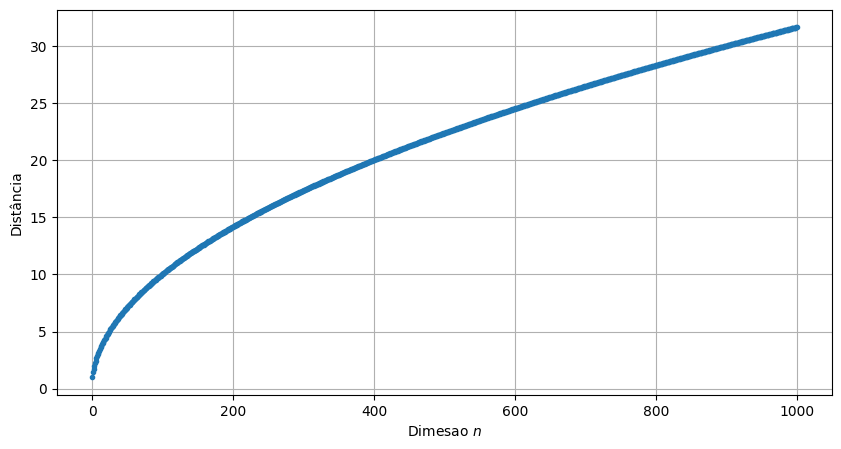

In [61]:
# plot
plt.figure(figsize=(10,5))
plt.plot(euclidean_distance, '.', label='Distancia euclidiana')
plt.xlabel('Dimesao $n$')
plt.ylabel('Distância')
plt.grid()
plt.show()